<a href="https://colab.research.google.com/github/codedmachine111/ML/blob/master/Multivariate_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate Linear Regression Problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Upload your own kaggle.json file from kaggle.com

!pip install opendatasets -q
import opendatasets as od
od.download("https://www.kaggle.com/datasets/ashydv/housing-dataset")

100%|██████████| 4.63k/4.63k [00:00<00:00, 7.90MB/s]

In [3]:
df = pd.read_csv('/content/housing-dataset/Housing.csv')
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [5]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
df.shape

(545, 13)

In [7]:
# Encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)
string_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
encoded_features = pd.DataFrame(encoder.fit_transform(df[string_columns]))
encoded_features.columns = encoder.get_feature_names_out(string_columns)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [8]:
encoded_features

,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
540,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
541,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
542,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df1 = df.drop(string_columns, axis=1)
df1.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [10]:
df2 = encoded_features.join(df1)
df2.head()

,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price,area,bedrooms,bathrooms,stories,parking
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,13300000,7420,4,2,3,2
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12250000,8960,4,4,4,3
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,12250000,9960,3,2,2,2
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,12215000,7500,4,2,2,3
4,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,11410000,7420,4,1,2,2


In [11]:
df2.dtypes, df.isnull().sum()

(mainroad_yes                       float64
 guestroom_yes                      float64
 basement_yes                       float64
 hotwaterheating_yes                float64
 airconditioning_yes                float64
 prefarea_yes                       float64
 furnishingstatus_semi-furnished    float64
 furnishingstatus_unfurnished       float64
 price                                int64
 area                                 int64
 bedrooms                             int64
 bathrooms                            int64
 stories                              int64
 parking                              int64
 dtype: object,
 price               0
 area                0
 bedrooms            0
 bathrooms           0
 stories             0
 mainroad            0
 guestroom           0
 basement            0
 hotwaterheating     0
 airconditioning     0
 parking             0
 prefarea            0
 furnishingstatus    0
 dtype: int64)

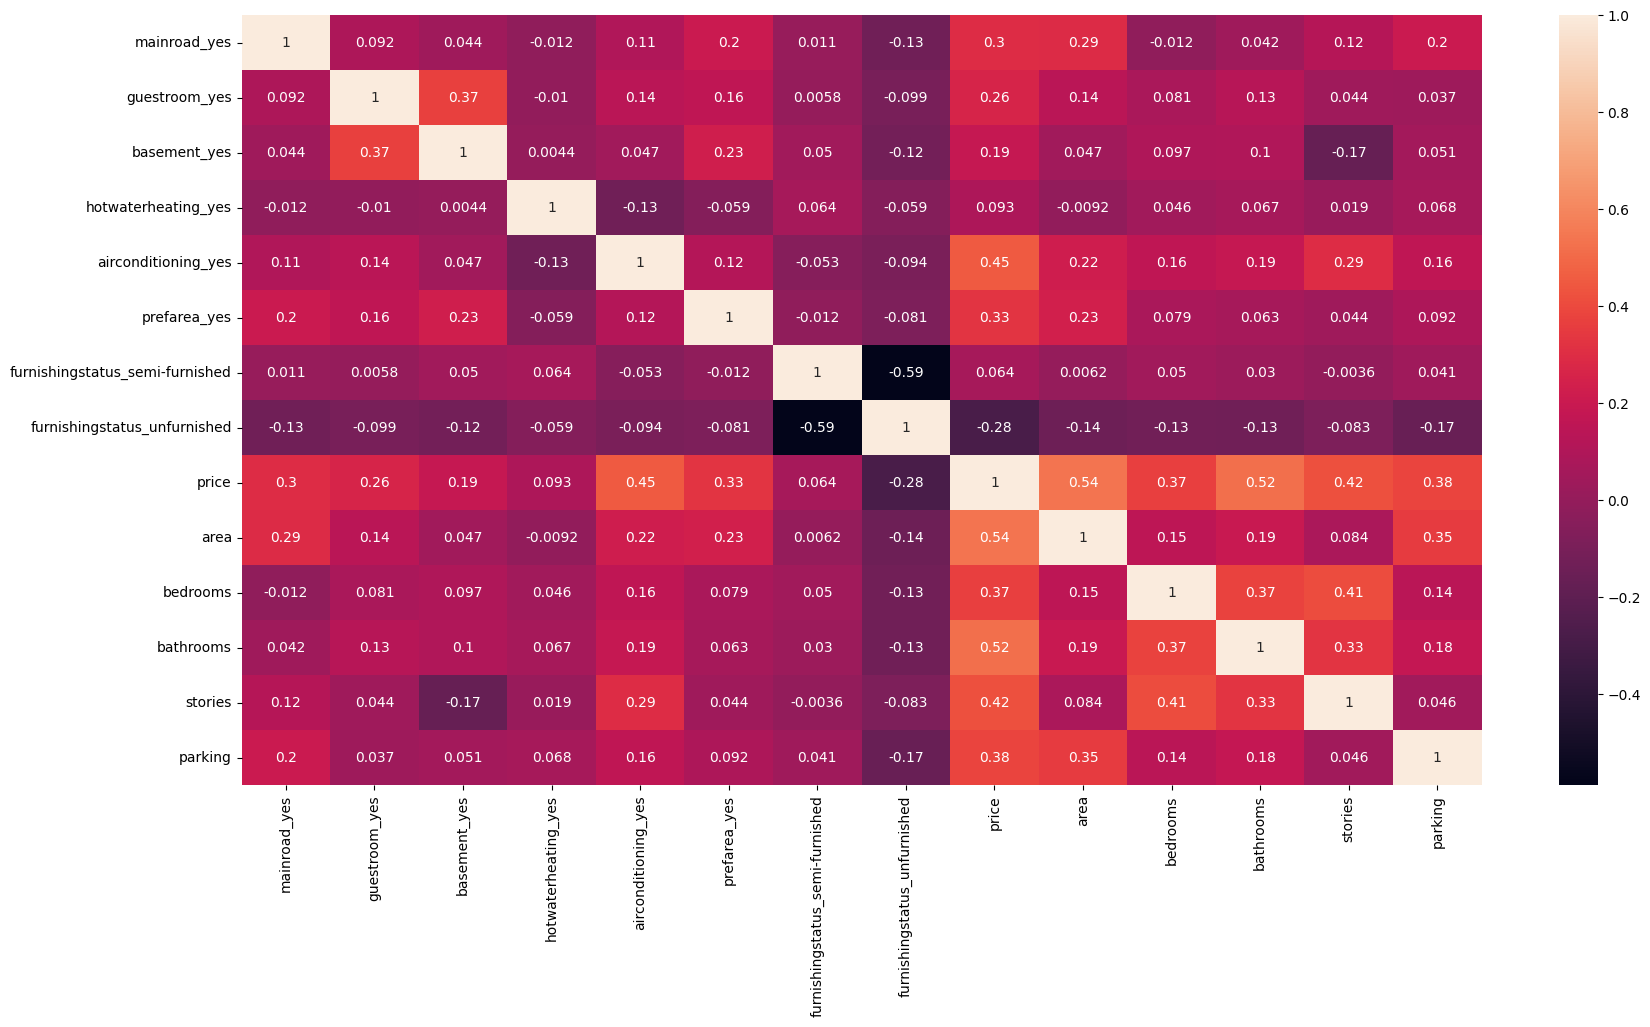

In [12]:
corr = df2.corr()

plt.subplots(figsize=(20,10))
corr_matrix = sns.heatmap(corr, annot=True)

In [13]:
df2.columns

Index(['mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished',
       'price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'],
      dtype='object')

In [14]:
df2.drop(['basement_yes','hotwaterheating_yes', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'], inplace=True, axis=1)
df2.head(5)

,mainroad_yes,guestroom_yes,airconditioning_yes,prefarea_yes,price,area,bedrooms,bathrooms,stories,parking
0,1.0,0.0,1.0,1.0,13300000,7420,4,2,3,2
1,1.0,0.0,1.0,0.0,12250000,8960,4,4,4,3
2,1.0,0.0,0.0,1.0,12250000,9960,3,2,2,2
3,1.0,0.0,1.0,1.0,12215000,7500,4,2,2,3
4,1.0,1.0,1.0,0.0,11410000,7420,4,1,2,2


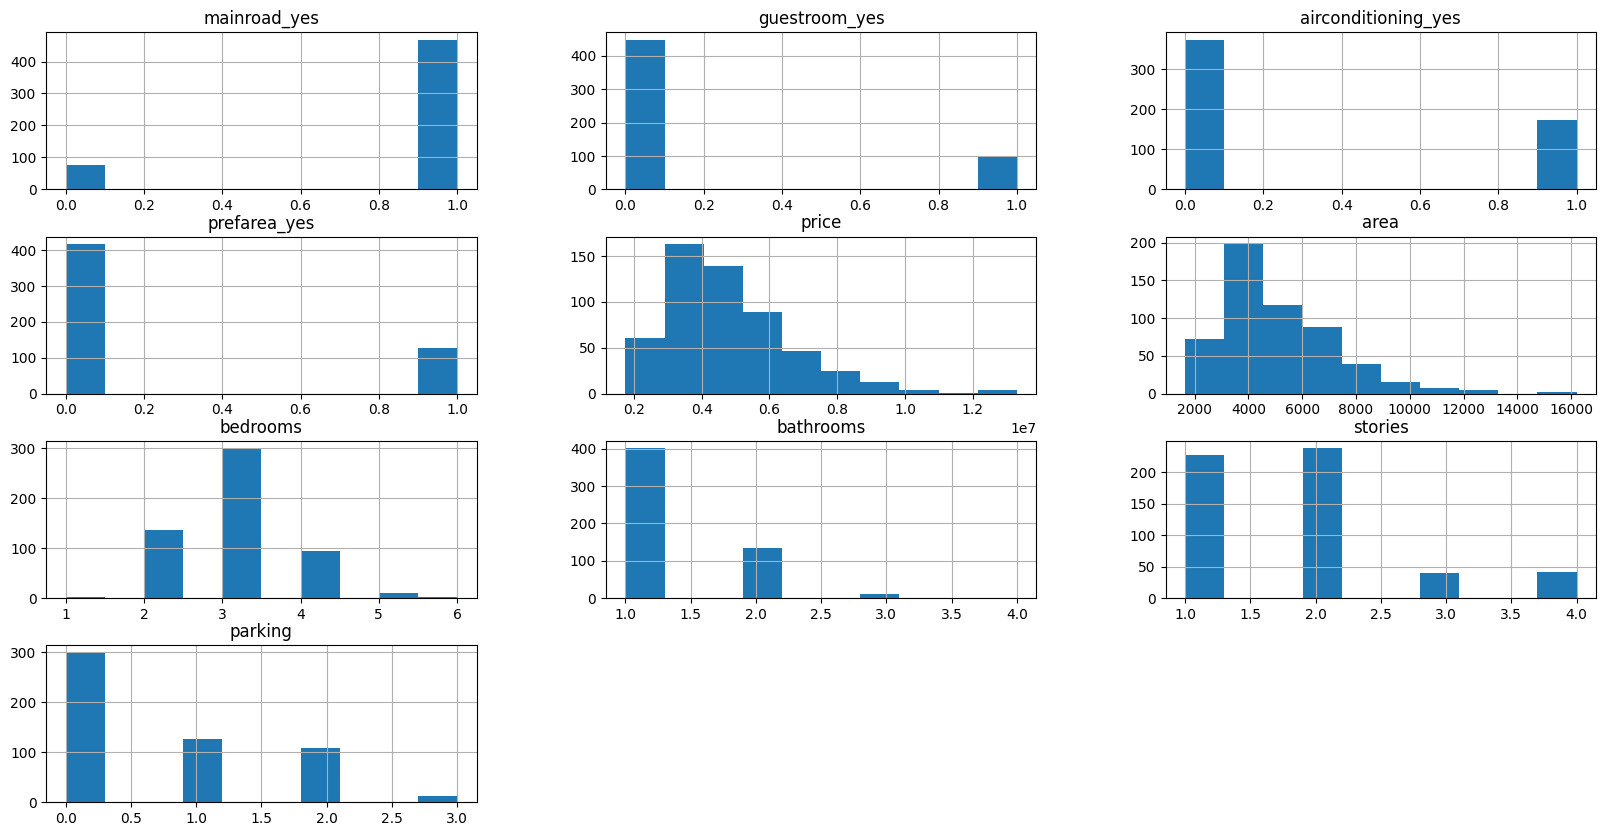

In [15]:
df2.hist(bins=10, figsize=(20,10));

In [16]:
# Scaling the features of the model
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
col_to_scale = ['area', 'bedrooms', 'bathrooms', 'stories', 'price', 'parking']
df2[col_to_scale] = scaler.fit_transform(df2[col_to_scale])

df2.head()

,mainroad_yes,guestroom_yes,airconditioning_yes,prefarea_yes,price,area,bedrooms,bathrooms,stories,parking
0,1.0,0.0,1.0,1.0,1.000000,0.396564,0.6,0.333333,0.666667,0.666667
1,1.0,0.0,1.0,0.0,0.909091,0.502405,0.6,1.000000,1.000000,1.000000
2,1.0,0.0,0.0,1.0,0.909091,0.571134,0.4,0.333333,0.333333,0.666667
3,1.0,0.0,1.0,1.0,0.906061,0.402062,0.6,0.333333,0.333333,1.000000
4,1.0,1.0,1.0,0.0,0.836364,0.396564,0.6,0.000000,0.333333,0.666667


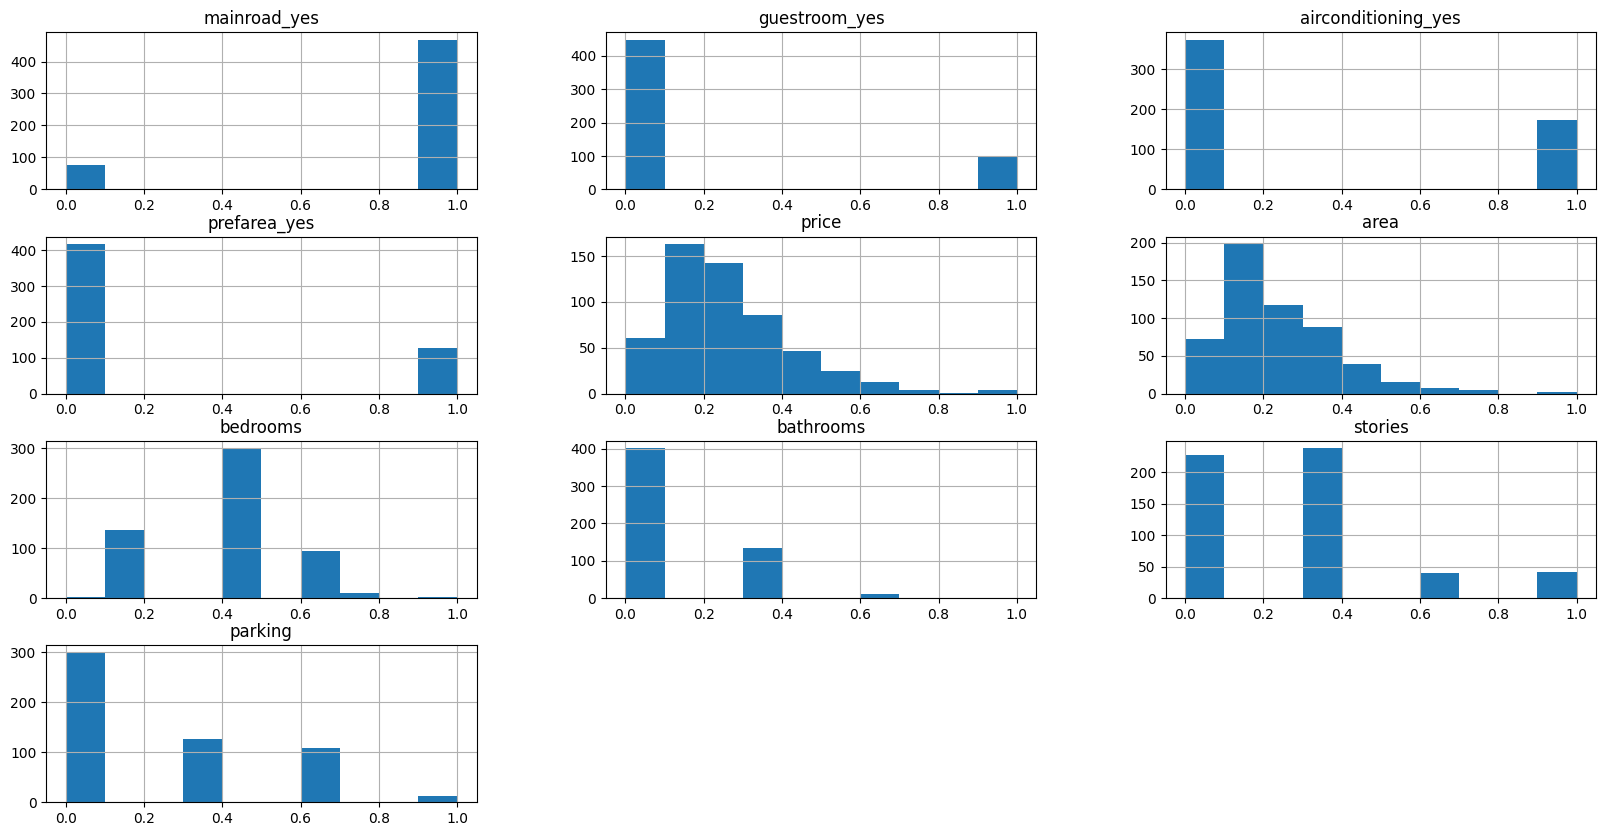

In [17]:
df2.hist(bins=10, figsize=(20,10));

<Axes: >

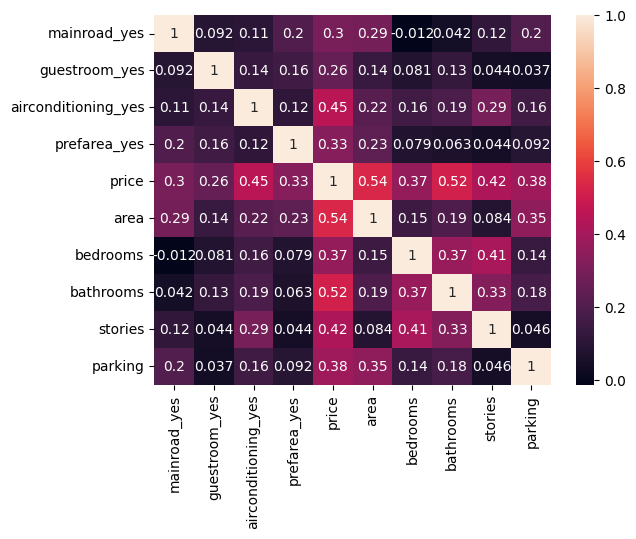

In [18]:
sns.heatmap(df2.corr(), annot=True)

In [19]:
y = df2['price']
X = df2.drop('price', axis=1)

X.shape, y.shape

((545, 9), (545,))

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((436, 9), (109, 9), (436,), (109,))

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(X_test)

In [23]:
y_pred.shape

(109,)

In [32]:
print(f'Slope : {lr.coef_}')
print(f'Intercept : {lr.intercept_}')

Slope : [0.03672615 0.03851502 0.06865404 0.05998461 0.28713298 0.05174054
 0.30255607 0.09365948 0.06893058]
Intercept : 0.02602210146903816


In [24]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mse

0.01395643780737645

In [25]:
r2 = r2_score(y_test, y_pred)
r2

0.631655392278026

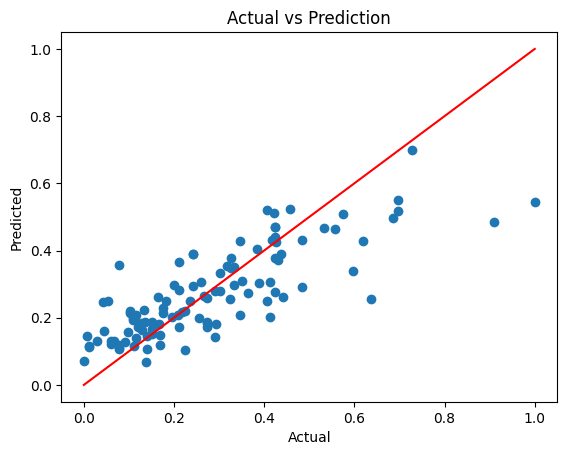

In [37]:
# Plotting results

x_range = np.linspace(min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max()), 100)
y_range = x_range

fig = plt.figure()
plt.scatter(y_test, y_pred)
plt.plot(x_range, y_range, color="red")

plt.title('Actual vs Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted');

# Comparing results with Random Forest

In [27]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [28]:
rf_pred = rf.predict(X_test)

In [29]:
mse_rf = mean_squared_error(y_test, y_pred)
mse_rf

0.01395643780737645

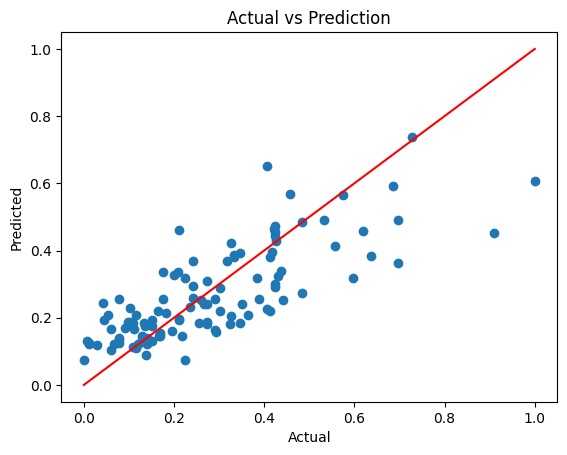

In [36]:
# Plotting results

x_range = np.linspace(min(y_test.min(), rf_pred.min()), max(y_test.max(), rf_pred.max()), 100)
y_range = x_range

fig = plt.figure()
plt.scatter(y_test, rf_pred)
plt.plot(x_range, y_range, color="red")

plt.title('Actual vs Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted');